In [132]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('covid-19cases.csv', )

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105748 entries, 0 to 105747
Data columns (total 46 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       105748 non-null  int64  
 1   date                             105748 non-null  object 
 2   continent                        52269 non-null   object 
 3   location                         52873 non-null   object 
 4   total_cases                      49259 non-null   float64
 5   new_cases                        51979 non-null   float64
 6   new_cases_smoothed               51185 non-null   float64
 7   total_deaths                     40323 non-null   float64
 8   new_deaths                       51979 non-null   float64
 9   new_deaths_smoothed              51185 non-null   float64
 10  total_cases_per_million          48993 non-null   float64
 11  new_cases_per_million            51915 non-null   float64
 12  ne

In [4]:
df = df.dropna(axis=1, how='all').drop(df.columns[0], axis=1)

In [5]:
idxs_for_notes = df[df['date'] == 'For Notes: '].index

In [6]:
df = df.drop(idxs_for_notes, axis=0)

In [7]:
df['date'] = pd.to_datetime(df['date']).apply(lambda x:x.month)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52873 entries, 0 to 105746
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             52873 non-null  int64  
 1   continent                        52269 non-null  object 
 2   location                         52873 non-null  object 
 3   total_cases                      49259 non-null  float64
 4   new_cases                        51979 non-null  float64
 5   new_cases_smoothed               51185 non-null  float64
 6   total_deaths                     40323 non-null  float64
 7   new_deaths                       51979 non-null  float64
 8   new_deaths_smoothed              51185 non-null  float64
 9   total_cases_per_million          48993 non-null  float64
 10  new_cases_per_million            51915 non-null  float64
 11  new_cases_smoothed_per_million   51120 non-null  float64
 12  total_deaths_per_

In [60]:
df2 = pd.DataFrame(df.groupby(['continent','date'])['continent'].count())


In [61]:
df['continent'].value_counts()

Europe           13748
Asia             12548
Africa           12482
North America     8360
South America     3133
Oceania           1998
Name: continent, dtype: int64

In [62]:

pd.set_option('display.max_rows', None)

In [63]:
df2.groupby(level='continent').count().index

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='continent')

In [82]:
dd = pd.DataFrame(data=df2.values.reshape(12, 6), index = range(1, 13), columns=df2.groupby(level='continent').count().index )

In [83]:
df2.values.reshape(12, 6)

array([[ 447,  478, 1098, 1334, 1436, 1385],
       [1443, 1442, 1390, 1224,  401,  404],
       [ 939,  884, 1192, 1219, 1283, 1239],
       [1284, 1286, 1256, 1111,  412,  443],
       [ 955,  923, 1376, 1363, 1414, 1366],
       [1418, 1419, 1369, 1209,  453,  483],
       [ 340,  346,  733,  913,  949,  913],
       [ 950,  949,  916,  808,  268,  275],
       [ 104,  115,  170,  208,  216,  208],
       [ 216,  216,  208,  207,   64,   66],
       [ 135,  133,  312,  334,  347,  335],
       [ 349,  348,  336,  297,  102,  105]], dtype=int64)

<AxesSubplot:xlabel='continent', ylabel='continent'>

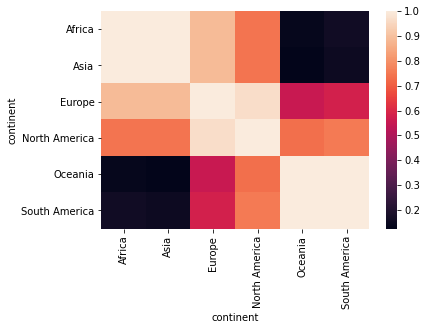

In [136]:
sns.heatmap(dd.corr())

In [137]:
dd.mean()

continent
Africa           715.000000
Asia             711.583333
Europe           863.000000
North America    852.250000
Oceania          612.083333
South America    601.833333
dtype: float64

In [130]:
pd.DataFrame(dd.mean().values.reshape(-1,1), index=dd.mean().index).corr(

,0
0,1.0
